Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing required datasets and initial look at our datasets

In [2]:
transData = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purBehav = pd.read_csv("QVI_purchase_behaviour.csv")

In [5]:
purBehav.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Examining transaction data

In [6]:
type(transData['STORE_NBR'][0])

numpy.int64

In [7]:
type(transData['LYLTY_CARD_NBR'][0])

numpy.int64

In [8]:
type(transData['DATE'][0])

numpy.int64

In [9]:
type(transData['TXN_ID'][0])

numpy.int64

In [10]:
type(transData['PROD_NAME'][0])

str

In [11]:
type(transData['PROD_NBR'][0])

numpy.int64

In [12]:
type(transData['PROD_QTY'][0])

numpy.int64

In [13]:
type(transData['TOT_SALES'][0])

numpy.float64

In [14]:
#Converting Excel integer date to Date format
from datetime import datetime
import xlrd

In [15]:
def conv(excel_date):
    python_date = datetime(*xlrd.xldate_as_tuple(excel_date, 0))
    return python_date
transData['DATE']=transData['DATE'].apply(conv)

In [16]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


A summary of PROD_NAME data column

In [17]:
transData['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [18]:
transData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [19]:
#To preserve the original data read, we assign it to df and will use df in our further analysis
df=transData.copy()

Fetching pack size from PROD_NAME and creating a different column for it : 'PACK_SIZE' 

In [20]:
def CreatePackSize(st):
    strnum=""
    for i in st:
        if i.isdigit():
            strnum+=i
    return int(strnum)   
df['PACK_SIZE']=df['PROD_NAME'].apply(CreatePackSize)

Cleaning data in PROD_NAME column

In [21]:
def cleanData(st):
    
    #To remove digits
    pt1 = r"[0-9][gG]"
    pt2 = r"[0-9]"
    st=re.sub(pt1, "", st)
    if re.search(pt2,st):
        st = re.sub(pt2, "", st)
    
    #To remove special characters
    pt3 = r"\W"
    l1 = set(re.findall(pt3,st))
    if " " in l1:
        l1.remove(" ")
    for elem in l1:
        st = re.sub(re.escape(elem),"", st)
    
    #To remove multiple spaces -1
    st = " ".join(st.split())
    return st

df['PROD_NAME'] =df['PROD_NAME'].apply(cleanData)

In [22]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [23]:
#Most commom words based on their frquency
Ser = df['PROD_NAME'].value_counts()
Ser

Kettle Mozzarella Basil Pesto         3304
Kettle Tortilla ChpsHnyJlpno Chili    3296
Cobs Popd SwtChlli SrCream Chips      3269
Tyrrells Crisps Ched Chives           3268
Cobs Popd Sea Salt Chips              3265
                                      ... 
RRD Pc Sea Salt                       1431
Woolworths Medium Salsa               1430
NCC Sour Cream Garden Chives          1419
French Fries Potato Chips             1418
WW Crinkle Cut Original               1410
Name: PROD_NAME, Length: 114, dtype: int64

Removing 'salsa' products

In [24]:
def fn(x):
    x=x.lower()
    y=x.find('salsa')
    if y==-1:
        return True
    else:
        return False
df = df[df['PROD_NAME'].apply(fn)]
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [25]:
#A summary of dataset
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


In [26]:
#To check in how many columns null values are present
df[df.isnull()==True].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
dtype: int64

<AxesSubplot:xlabel='PROD_QTY'>

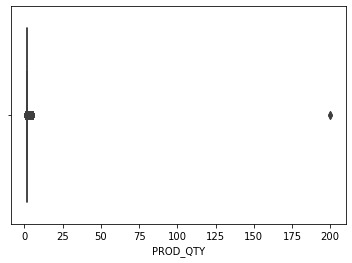

In [27]:
#To find out outliers we use box plot
sns.boxplot(df['PROD_QTY'])

In [28]:
#Spotting the outlier
outlier = df[df['PROD_QTY']==200]
outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [29]:
outlier['LYLTY_CARD_NBR'][69762]

226000

In [30]:
df[df['LYLTY_CARD_NBR']==outlier['LYLTY_CARD_NBR'][69762]] 
#To check whether the outlier has made any other purchases

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [31]:
#Removing outsliers
df = df[df['LYLTY_CARD_NBR']!=outlier['LYLTY_CARD_NBR'][69762]] 

<AxesSubplot:xlabel='PROD_QTY'>

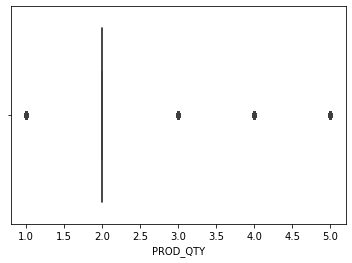

In [32]:
#To check the presence of major outliers
sns.boxplot(df['PROD_QTY'])

In [33]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [34]:
dfgrp = df.groupby('DATE')
tmpgrp = dfgrp.count().reset_index()
tmpgrp

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-07-01,663,663,663,663,663,663,663,663
1,2018-07-02,650,650,650,650,650,650,650,650
2,2018-07-03,674,674,674,674,674,674,674,674
3,2018-07-04,669,669,669,669,669,669,669,669
4,2018-07-05,660,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...,...
359,2019-06-26,657,657,657,657,657,657,657,657
360,2019-06-27,669,669,669,669,669,669,669,669
361,2019-06-28,673,673,673,673,673,673,673,673
362,2019-06-29,703,703,703,703,703,703,703,703


In [35]:
#To count the number of rows i.e. number of dates
len(dfgrp.indices)

364

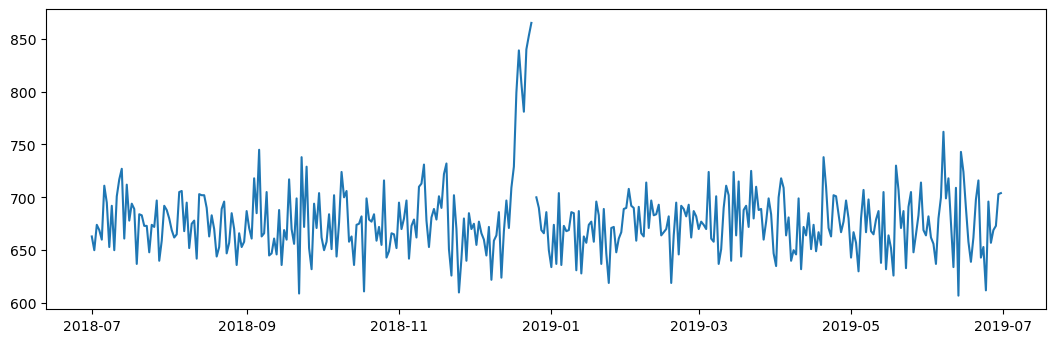

In [36]:
#Creating date groups
rndates = np.arange(0,365)
Dates_df = pd.DataFrame(index=rndates,columns=['Date','Transactions'])
date1 = '2018-07-01'
date2 = '2019-06-30'
mydates = pd.date_range(date1, date2).tolist()

flagDates = [] #For capturing those dates when there was no transaction made

ctrTXN = 0
ctrDates = 0
for i in mydates:
    if len(tmpgrp[tmpgrp['DATE']==i]['TXN_ID']) != 0 :
        Dates_df.loc[ctrDates]['Transactions'] = tmpgrp[tmpgrp['DATE']==i]['TXN_ID'].loc[ctrTXN]
        ctrTXN+=1
    else:
        flagDates.append(i) 
    Dates_df.loc[ctrDates]['Date'] = i
    ctrDates+=1

fig = plt.figure(figsize=(10,3),dpi=100)
ax=fig.add_axes([0,0,1,1])
x=Dates_df['Date']
y=Dates_df['Transactions']
ax.plot(x,y)

In [37]:
#Finding out the date on which no transactions were made
print("The date/dates with no sales is/are :-")
for i in flagDates:
    print(i.date().strftime('%d-%m-%Y'))

The date/dates with no sales is/are :-
25-12-2018


Finding out the maximum and minimum pack size

In [38]:
df['PACK_SIZE'].min()

70

In [39]:
df['PACK_SIZE'].max()

380

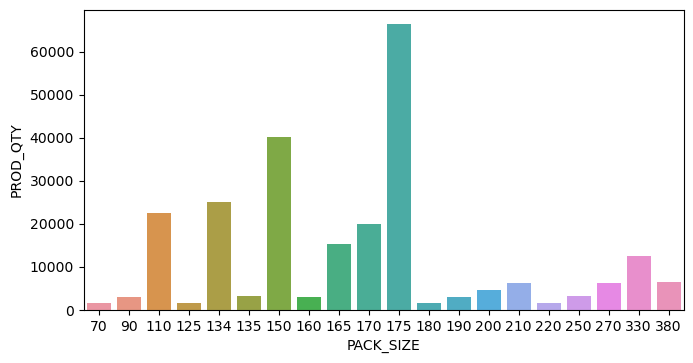

In [40]:
#Plotting a histogram according to 'PACK_SIZE'
x=df.groupby('PACK_SIZE').count()
fig=plt.figure(figsize=(6,3),dpi=100)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x=x.index,y='PROD_QTY',data=x)

Creating BRAND names

In [41]:
df['PROD_NAME']

0                Natural Chip Compny SeaSalt
1                           CCs Nacho Cheese
2           Smiths Crinkle Cut Chips Chicken
3             Smiths Chip Thinly SCreamOnion
4         Kettle Tortilla ChpsHnyJlpno Chili
                         ...                
264831    Kettle Sweet Chilli And Sour Cream
264832               Tostitos Splash Of Lime
264833                      Doritos Mexicana
264834    Doritos Corn Chip Mexican Jalapeno
264835               Tostitos Splash Of Lime
Name: PROD_NAME, Length: 246740, dtype: object

In [42]:
def BrandName(val):
    return val.split(" ")[0]
df['BRAND_NAME']=df['PROD_NAME'].apply(BrandName)

In [43]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150,Kettle


In [44]:
#Checking various types of Brand Names present in the dataset
df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [45]:
CleanBrandNamesMap={'Red':'RRD','Dorito':'Doritos','Infzns':'Infuzions','Smith':'Smiths','Snbts':'Sunbites'}
def CleanNames(val):
    if val in CleanBrandNamesMap:
        return CleanBrandNamesMap[val]
    else:
        return val
df['BRAND_NAME']=df['BRAND_NAME'].apply(CleanNames)

In [46]:
#Checking values after cleaning brand names
df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
Woolworths     1516
GrnWves        1468
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

### Examining Customer data

In [47]:
purBehav.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [48]:
purBehav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [49]:
purBehav['LYLTY_CARD_NBR'].nunique()

72637

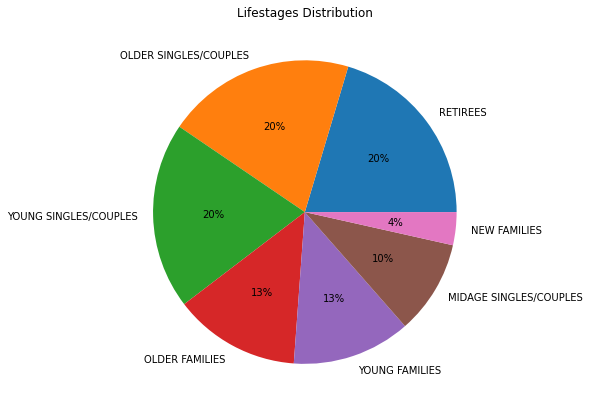

In [50]:
plt.title("Lifestages Distribution")
purBehav['LIFESTAGE'].value_counts().plot.pie(ylabel="", autopct='%1.0f%%',figsize=(8,8))
plt.tight_layout()

<AxesSubplot:title={'center':'Premium Customer Distribution'}>

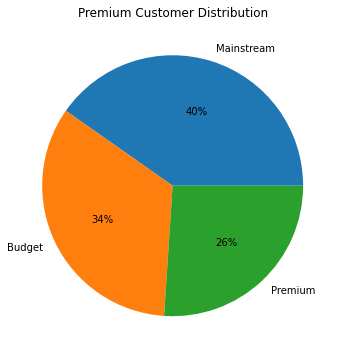

In [51]:
plt.title("Premium Customer Distribution")
purBehav['PREMIUM_CUSTOMER'].value_counts().plot.pie(ylabel="",autopct='%1.0f%%',figsize=(6,6))

Merging customer data and transaction data into new dataframe ('newdf')

In [52]:
newdf = pd.merge(df,purBehav,how='left',on='LYLTY_CARD_NBR')

In [53]:
#newdf contains the merged dataset
newdf.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210,Grain,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives,2,7.2,210,Grain,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [54]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  int64         
 9   BRAND_NAME        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


In [55]:
#To check in how many columns null values are present
newdf[newdf.isnull()==True].count()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [56]:
newdf.to_csv("QVI_data_self.csv")

### Q- Who spends the most on chips (total sales)?

##### Describing customers by lifestage

In [57]:
#Numeric value of total sales
newdf.groupby('LIFESTAGE').sum()['TOT_SALES']

LIFESTAGE
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
OLDER FAMILIES            328519.90
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
Name: TOT_SALES, dtype: float64

<AxesSubplot:title={'center':'Total sales by Lifesatge'}>

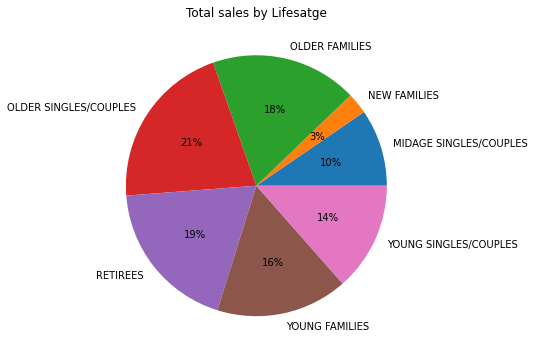

In [58]:
#Percent categorization of total sales
plt.title("Total sales by Lifesatge")
newdf.groupby('LIFESTAGE').sum()['TOT_SALES'].plot.pie(ylabel="",autopct='%1.0f%%',figsize=(6,6))

##### How premium are they?

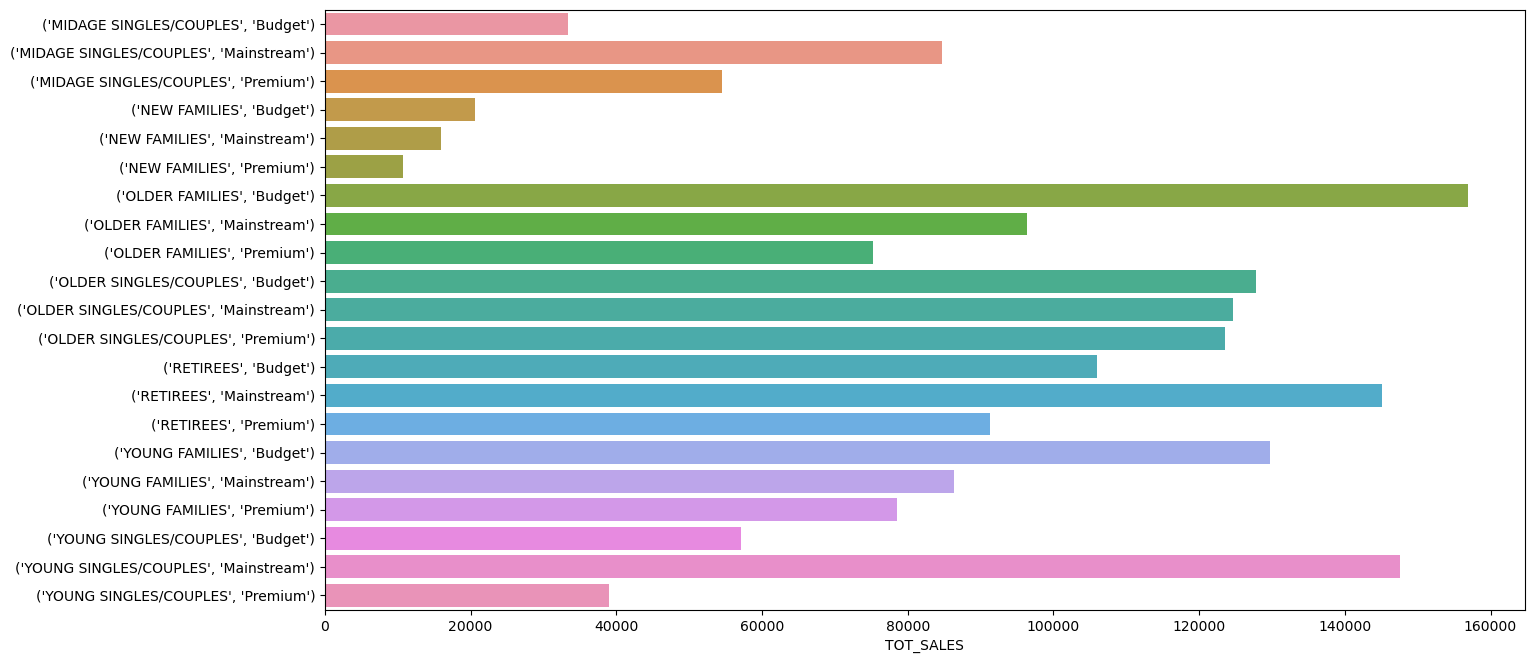

In [59]:
tmpdf=newdf.pivot_table(values='TOT_SALES',index=['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc=sum)
fig=plt.figure(figsize=(12,6),dpi=100)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x='TOT_SALES',y=tmpdf.index,data=tmpdf)

array([<AxesSubplot:>], dtype=object)

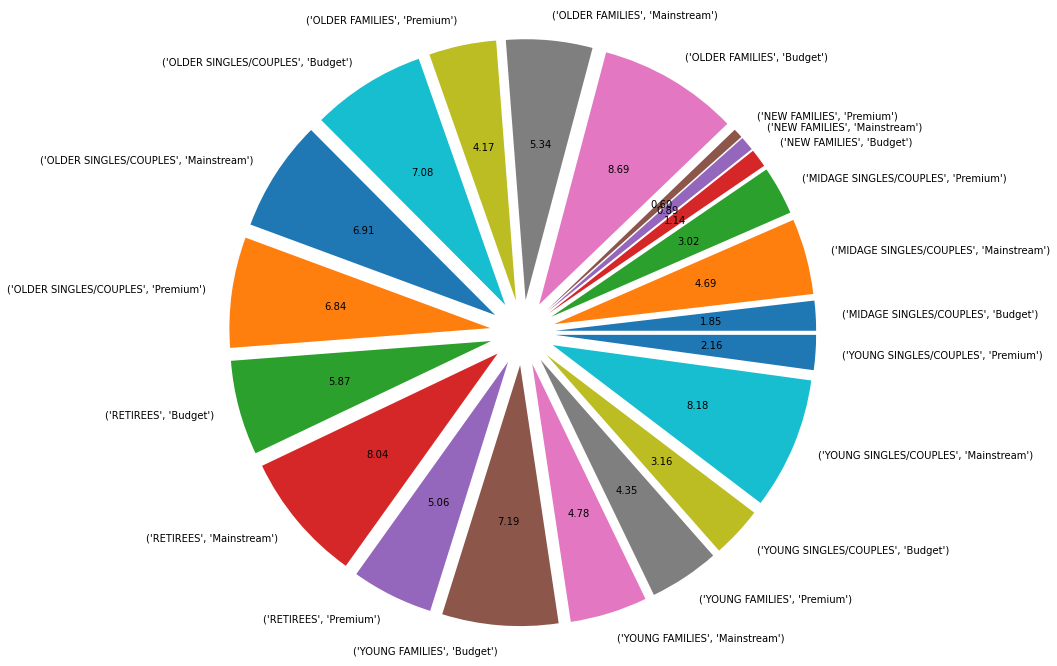

In [60]:
#Pie chart
tmpdf.plot.pie(labels=tmpdf.index,subplots=True,figsize=(12,12),autopct='%.2f',ylabel="",legend=None,explode=tuple(np.ones(shape=21)/8))

### Q- How many customers are in each segment?

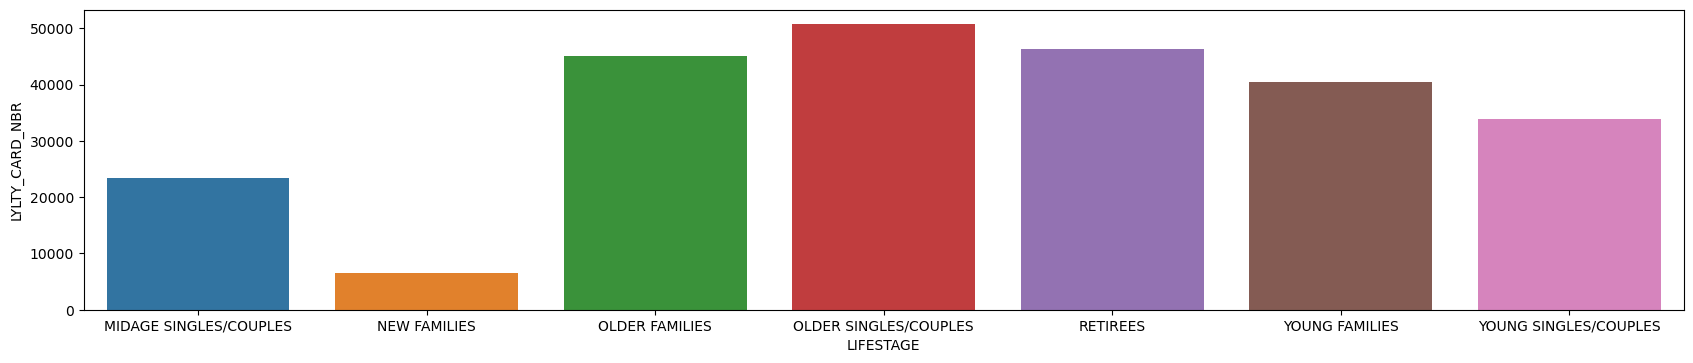

In [61]:
tmpdf=newdf.groupby('LIFESTAGE').count()
fig=plt.figure(figsize=(16,3),dpi=100)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x=tmpdf.index,y='LYLTY_CARD_NBR',data=tmpdf)

In [62]:
tmpdf = newdf.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
tmpdf['LYLTY_CARD_NBR']

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               4691
                        Mainstream          11095
                        Premium              7612
NEW FAMILIES            Budget               2824
                        Mainstream           2185
                        Premium              1488
OLDER FAMILIES          Budget              21514
                        Mainstream          13241
                        Premium             10403
OLDER SINGLES/COUPLES   Budget              17172
                        Mainstream          17061
                        Premium             16560
RETIREES                Budget              14225
                        Mainstream          19970
                        Premium             12236
YOUNG FAMILIES          Budget              17763
                        Mainstream          11947
                        Premium             10784
YOUNG SINGLES/COUPLES   Budget               8573
         

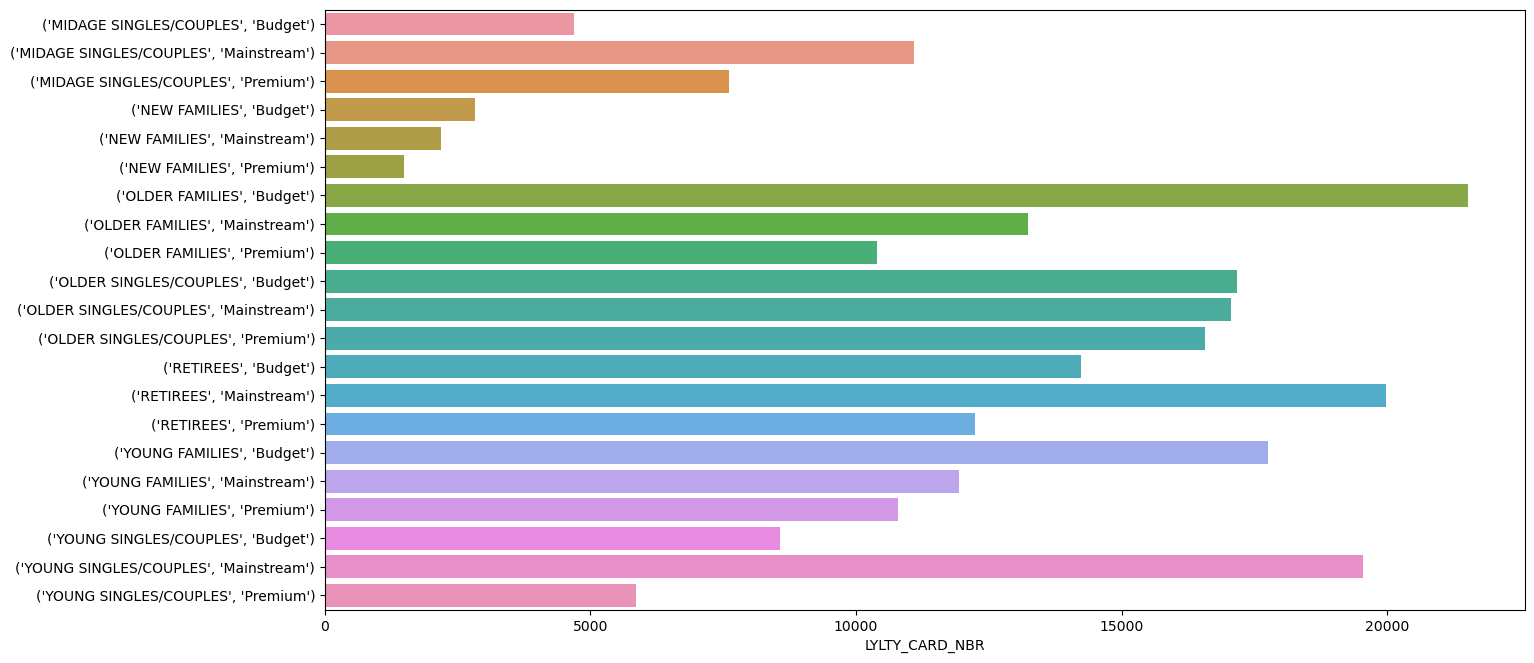

In [63]:
fig=plt.figure(figsize=(12,6),dpi=100)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x='LYLTY_CARD_NBR',y=tmpdf.index,data=tmpdf)

### Q- How many chips are bought per customer by segment?

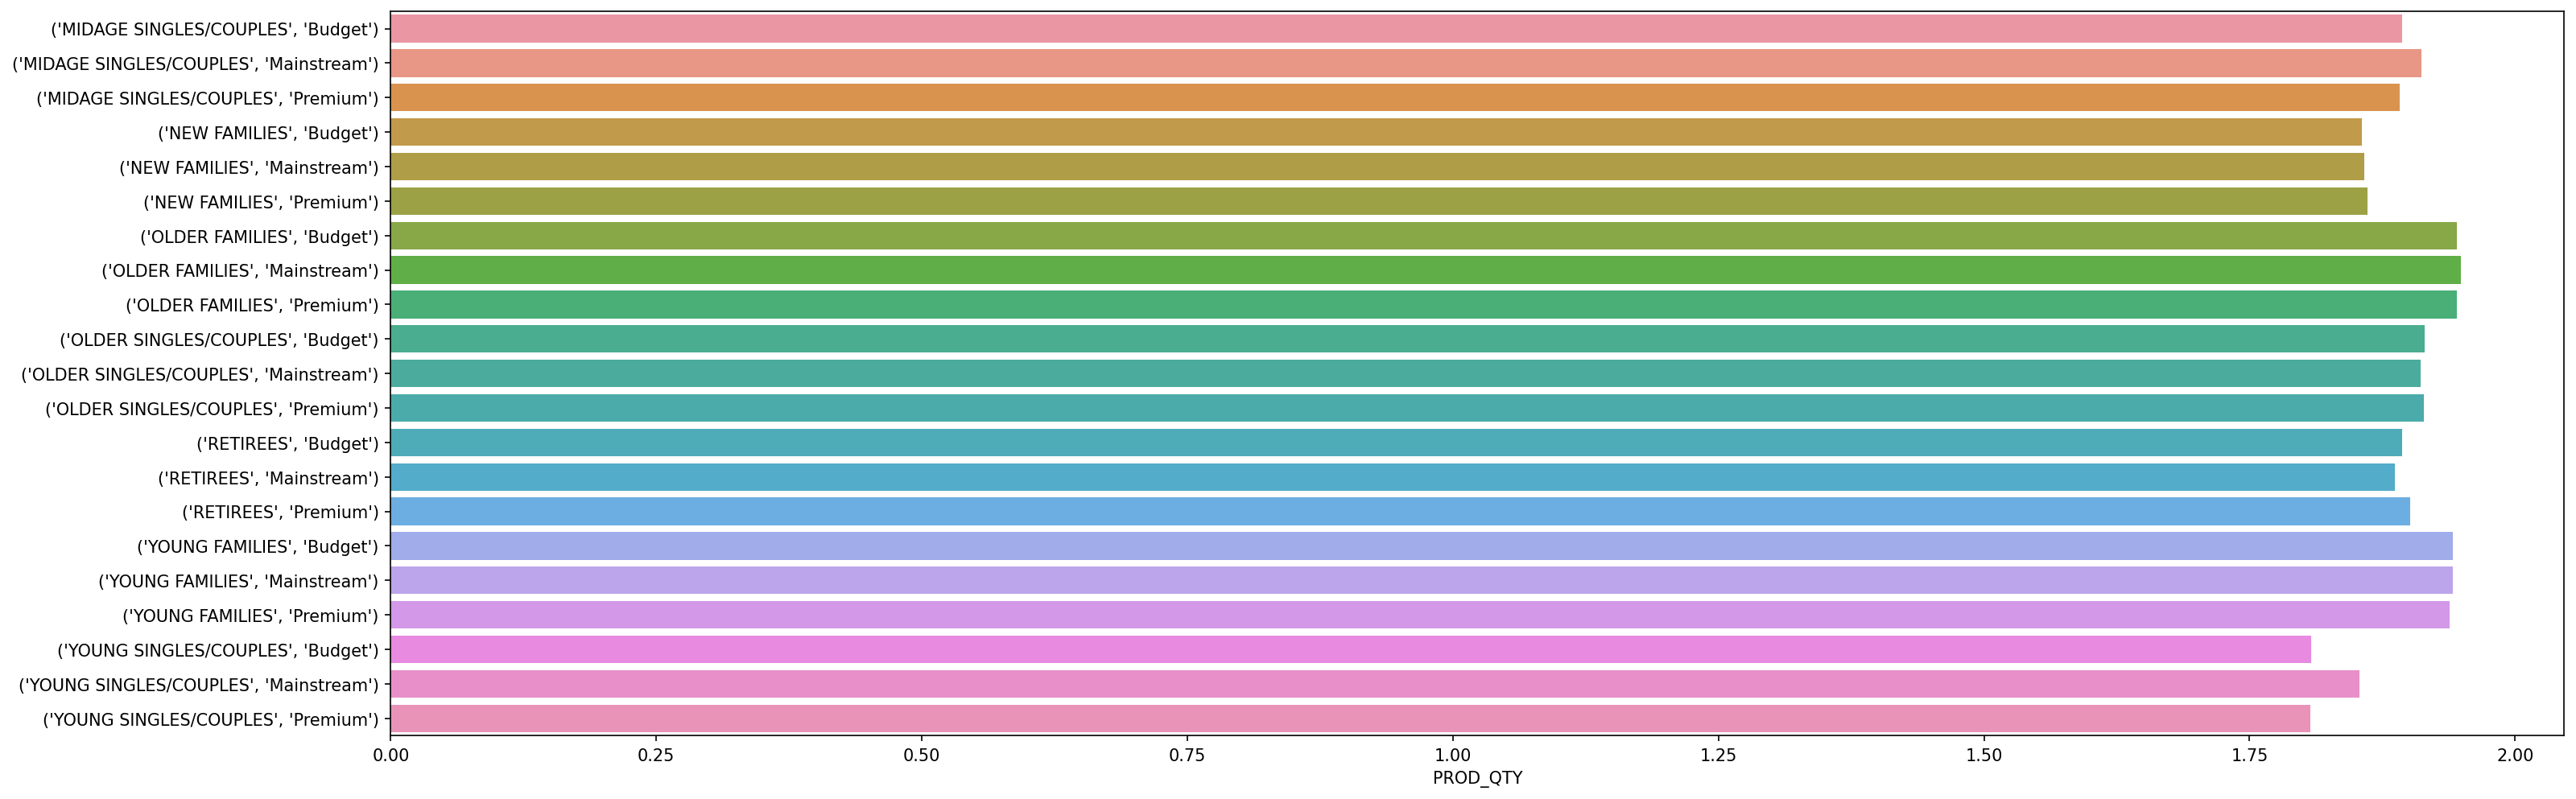

In [64]:
tmpdf = newdf.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()
fig=plt.figure(figsize=(18,6),dpi=150)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x='PROD_QTY',y=tmpdf.index,data=tmpdf)

In [65]:
tmpdf=newdf.groupby('LIFESTAGE').mean()

<AxesSubplot:title={'center':'Number of chips bought per customer Lifestage'}>

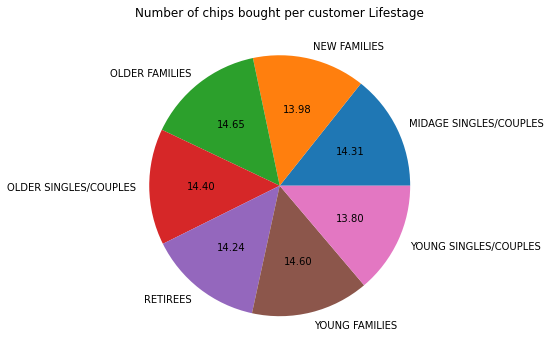

In [66]:
tmpdf.plot.pie(y='PROD_QTY',legend=None,ylabel="",autopct='%.2f',title='Number of chips bought per customer Lifestage',figsize=(6,6))

### Q- What's the average chip price by customer segment?

In [67]:
a=newdf.copy()
a['COST']=a['TOT_SALES']/a['PROD_QTY']

In [68]:
meandf=a.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).mean()

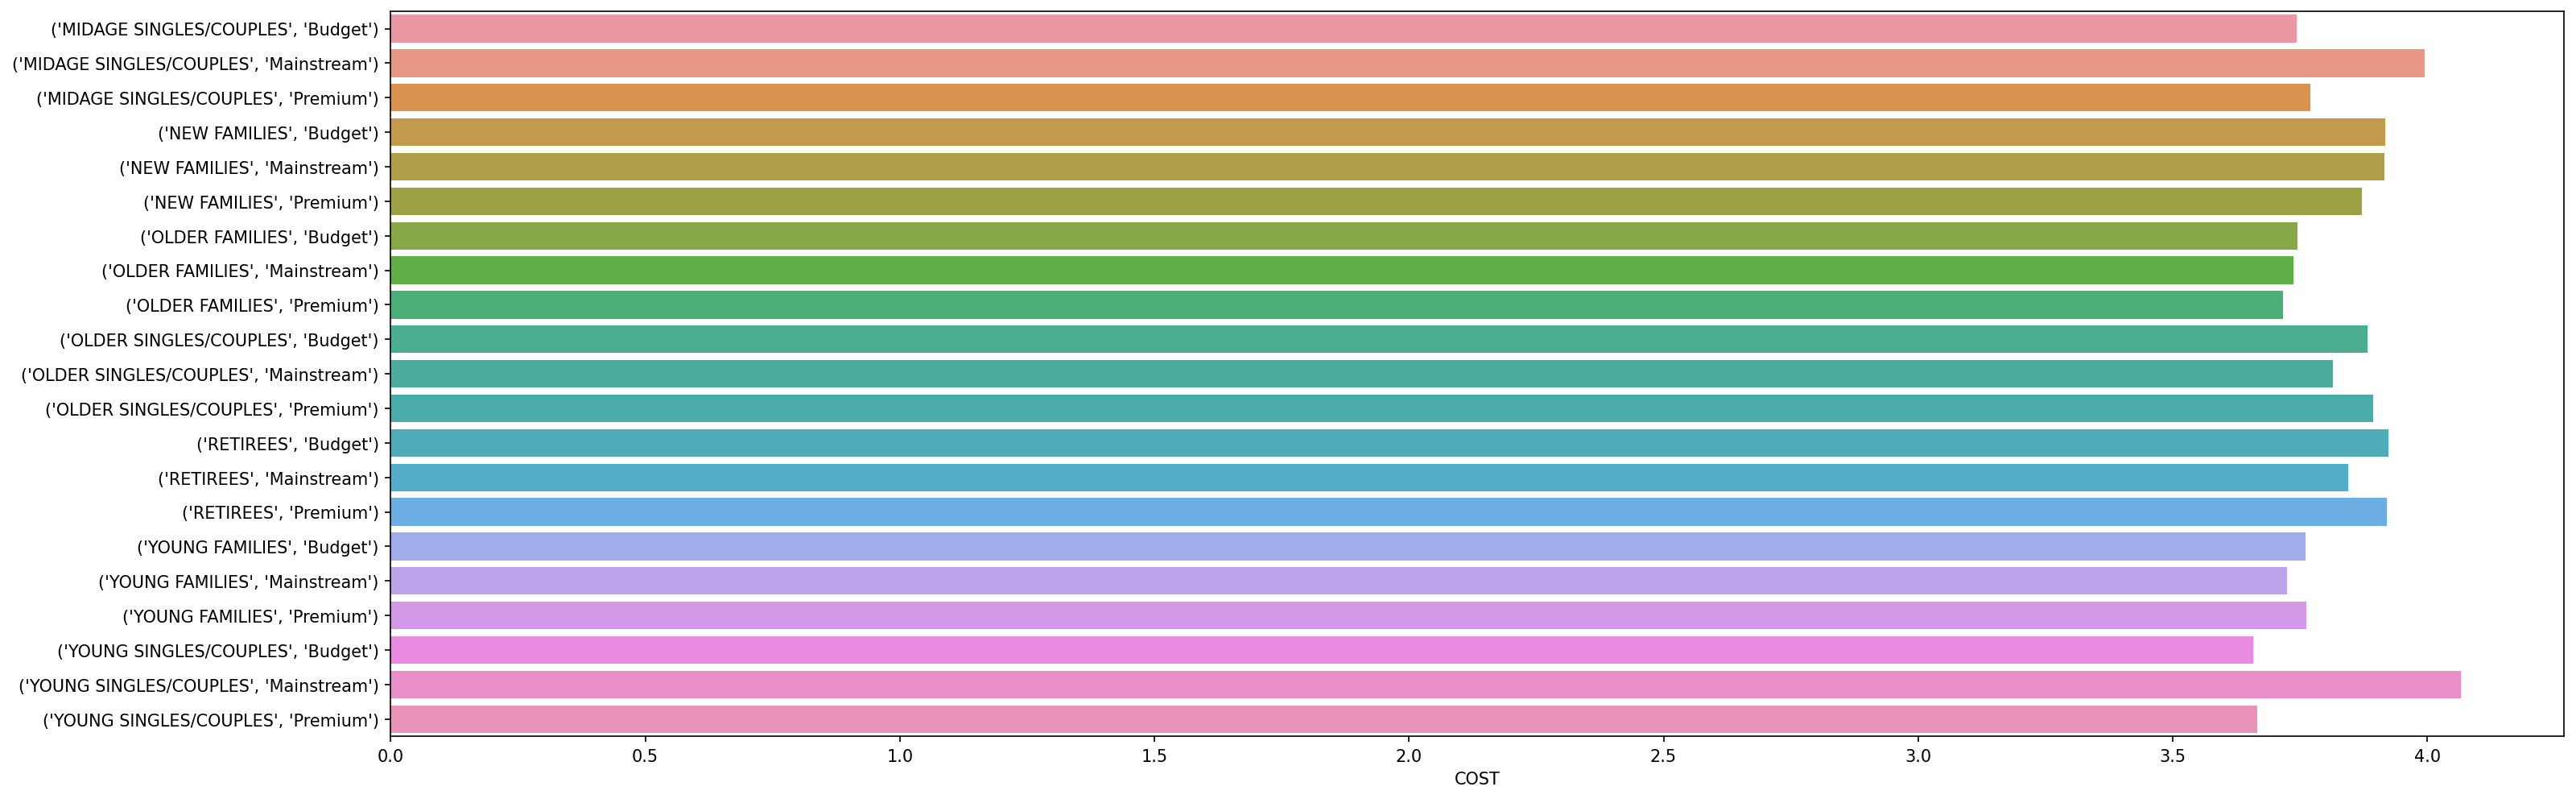

In [69]:
fig=plt.figure(figsize=(18,6),dpi=150)
ax=fig.add_axes([0,0,1,1])
sns.barplot(x='COST',y=meandf.index,data=meandf)

### Performing independent t-test 
#### Between mainstream vs premium and budget young singles and couples

In [70]:
import math
from scipy.stats import t
#Standard deviation
stddf = a.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).std()
std = stddf['COST'].loc['YOUNG SINGLES/COUPLES']['Mainstream']
stdb = stddf['COST'].loc['YOUNG SINGLES/COUPLES']['Budget']
stdp = stddf['COST'].loc['YOUNG SINGLES/COUPLES']['Premium']
#Sample size 'n'
countdf = a.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count()
n = countdf['COST'].loc['YOUNG SINGLES/COUPLES']['Mainstream']
nb = countdf['COST'].loc['YOUNG SINGLES/COUPLES']['Budget']
np = countdf['COST'].loc['YOUNG SINGLES/COUPLES']['Premium']
#Mean data
m = meandf['COST'].loc['YOUNG SINGLES/COUPLES']['Mainstream']
mb = meandf['COST'].loc['YOUNG SINGLES/COUPLES']['Budget']
mp = meandf['COST'].loc['YOUNG SINGLES/COUPLES']['Premium']
#Calculating standard errors
se = std/math.sqrt(n)
seb = stdb/math.sqrt(nb)
sep = stdp/math.sqrt(np)
#Calculating std error differnece
sed1 = math.sqrt(se**2 + seb**2)
sed2 = math.sqrt(se**2 + sep**2)
#Calculating t-values
t_stat1 = (m - mb)/sed1
t_stat2 = (m - mp)/sed2
dfb = n + nb -2
dfp = n + np -2
#Calculating critical value
alpha=0.05
cvb = t.ppf(1-alpha, dfb)
cvp = t.ppf(1-alpha, dfp)
#Calculating p-value
p1=(1-t.cdf(t_stat1,dfb))*2
p2=(1-t.cdf(t_stat2,dfp))*2

In [71]:
#Understanding result of independent t-test
if t_stat1 <= cvb and t_stat2 <= cvp:
    print("Mean values of both groups are significantly equal")
elif t_stat1 > cvb and t_stat2 <= cvp:
    print("Premium and Mainstream categories are quite similar")
elif t_stat2 > cvp and t_stat1 <= cvb:
    print("Budget and Mainstream categories are quite similar")
else:
    print("The groups are significantly different")

The groups are significantly different


In [72]:
#Conculding from p-values
if p1>alpha and p2>alpha:
    print("Results from our sample data occured by chance")
elif p2<=alpha and p1>alpha:
    print("The unit price of mainstream is similar to premium")
elif p1<=alpha and p2>alpha:
    print("The unit price of mainstream is similar to Budget")
else:
    print("The unit price for mainstream, young singles/couples ARE significantly higher than that of budget or premium, young singles and couples.")

The unit price for mainstream, young singles/couples ARE significantly higher than that of budget or premium, young singles and couples.


### Top-5 brands preffered by our target segment

In [73]:
#Top 5 Brands preffered by mainstream young singles/couples 
newdf[(newdf['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['BRAND_NAME'].value_counts().head(5)

Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND_NAME, dtype: int64

In [74]:
#Top 5 Brands preffered by mainstream midage singles/couples 
newdf[(newdf['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['BRAND_NAME'].value_counts().head(5)

Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND_NAME, dtype: int64

## Analysing buying habits of target segment

### Finding product quantity bought by target segment

In [75]:
newdf[(newdf['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['PROD_QTY'].value_counts().head(5)

2    16493
1     2986
4       24
3       24
5       17
Name: PROD_QTY, dtype: int64

In [76]:
newdf[(newdf['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['PROD_QTY'].value_counts().head(5)

2    9963
1    1081
5      21
3      19
4      11
Name: PROD_QTY, dtype: int64

### Finding pack size of our target segment

In [77]:
newdf[(newdf['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['PACK_SIZE'].value_counts().head(5)

175    2975
150    1777
134    1159
110    1124
170     882
Name: PACK_SIZE, dtype: int64

In [79]:
newdf[(newdf['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (newdf['PREMIUM_CUSTOMER']=='Mainstream')]['PACK_SIZE'].value_counts().head(5)

175    4997
150    3080
134    2315
110    2051
170    1575
Name: PACK_SIZE, dtype: int64

## Analysis :-
#### Sales of chips tends to increase before Christmas
#### No transactions are made on Christmas as stores are closed that day
#### Our target segment should be Mainstream - young singles/couples 
##### Our target segment usually buys 2 packet of chips &
##### We can also see that our target segment tends to buy mostly 175g and 150g packs of chips.